## ***14.PCA***





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


from sklearn.preprocessing import StandardScaler,scale
import warnings
warnings.filterwarnings('ignore')

In [ ]:
wine=pd.read_csv('wine.csv')

In [ ]:

wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


#### 1]EDA

In [ ]:
wine.dtypes

,0
Type,int64
Alcohol,float64
Malic,float64
Ash,float64
Alcalinity,float64
Magnesium,int64
Phenols,float64
Flavanoids,float64
Nonflavanoids,float64
Proanthocyanins,float64


In [ ]:

wine.isna().sum()

,0
Type,0
Alcohol,0
Malic,0
Ash,0
Alcalinity,0
Magnesium,0
Phenols,0
Flavanoids,0
Nonflavanoids,0
Proanthocyanins,0


In [ ]:
wine.duplicated().sum()

np.int64(0)

<Axes: >

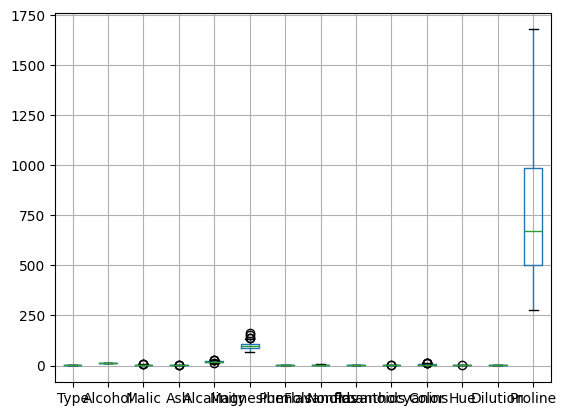

In [ ]:
#no null values or duplication in dataset
#check for outliers
wine.boxplot()

array([[<Axes: title={'center': 'Type'}>,
        <Axes: title={'center': 'Alcohol'}>,
        <Axes: title={'center': 'Malic'}>,
        <Axes: title={'center': 'Ash'}>],
       [<Axes: title={'center': 'Alcalinity'}>,
        <Axes: title={'center': 'Magnesium'}>,
        <Axes: title={'center': 'Phenols'}>,
        <Axes: title={'center': 'Flavanoids'}>],
       [<Axes: title={'center': 'Nonflavanoids'}>,
        <Axes: title={'center': 'Proanthocyanins'}>,
        <Axes: title={'center': 'Color'}>,
        <Axes: title={'center': 'Hue'}>],
       [<Axes: title={'center': 'Dilution'}>,
        <Axes: title={'center': 'Proline'}>, <Axes: >, <Axes: >]],
      dtype=object)

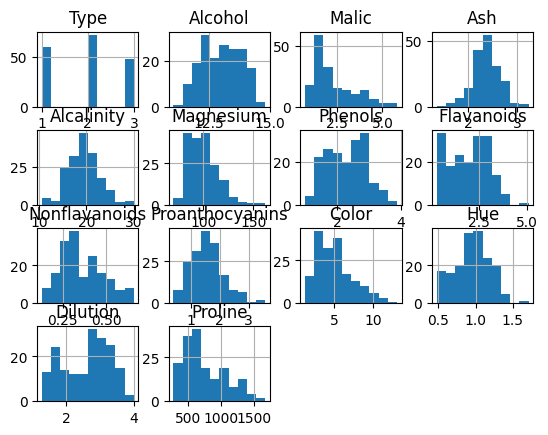

In [ ]:
wine.hist()

In [ ]:
features=wine.drop(columns=['Type'])
target=wine[['Type']]

<Axes: >

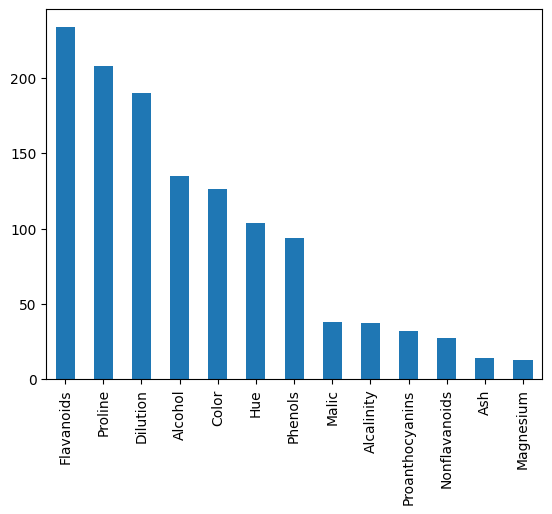

In [ ]:
def outlier_capping(features,column):
 Q1=features[column].quantile(0.25)
 Q3=features[column].quantile(0.75)
 IQR=Q3-Q1
 UE=Q3+1.5*IQR
 LE=Q1-1.5*IQR
 features[column]=features[column].apply(lambda x:UE if x>UE else LE if x<LE else x)
for col in features.select_dtypes(['float']).columns:
 outlier_capping(features,col)

<Axes: >

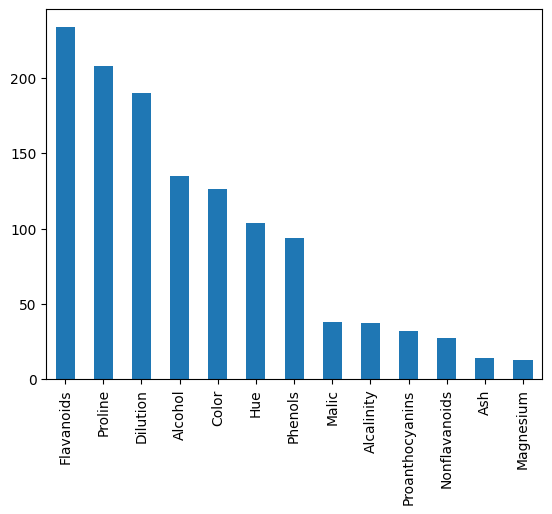

In [ ]:
#feature selection using F_class as feature has discrete and continuous
from sklearn.feature_selection import f_classif
f=f_classif(features,target)
pd.Series(f[0],index=features.columns).sort_values(ascending=False).plot(kind='bar')

In [ ]:
features.drop(columns=['Malic','Alcalinity','Proanthocyanins','Nonflavanoids','Ash','Magnesium'])

,Alcohol,Phenols,Flavanoids,Color,Hue,Dilution,Proline
0,14.23,2.80,3.06,5.64,1.04,3.92,1065
1,13.20,2.65,2.76,4.38,1.05,3.40,1050
2,13.16,2.80,3.24,5.68,1.03,3.17,1185
3,14.37,3.85,3.49,7.80,0.86,3.45,1480
4,13.24,2.80,2.69,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...
173,13.71,1.68,0.61,7.70,0.64,1.74,740
174,13.40,1.80,0.75,7.30,0.70,1.56,750
175,13.27,1.59,0.69,10.20,0.59,1.56,835
176,13.17,1.65,0.68,9.30,0.60,1.62,840


#### 2]Dimensionality Reduction with PCA

In [ ]:
#Standardizing
wine_std=scale(features)

In [ ]:
wine_std

array([[ 1.51861254, -0.56553422,  0.24064008, ...,  0.36660959,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.50172839, -0.86217567, ...,  0.41076822,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02694849,  1.15331518, ...,  0.32245097,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.77705125, -0.40583812, ..., -1.6205284 ,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.23659622,  0.0124713 , ..., -1.57636978,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.61297912,  1.41951209, ..., -1.53221115,
        -1.42894777, -0.59516041]])

In [ ]:
pca = PCA()
pca_values = pca.fit_transform(wine_std)

In [ ]:

pca_values

array([[ 3.33311526,  1.46019169, -0.1385213 , ..., -0.43554842,
         0.60147762, -0.09493676],
       [ 2.22709845, -0.32011134, -2.05519811, ..., -0.11349364,
         0.37690728,  0.00845951],
       [ 2.53291258,  1.05580392,  1.04035771, ..., -0.27176615,
         0.03336114,  0.02807011],
       ...,
       [-2.69579519,  2.80195147, -0.96912294, ...,  0.58032502,
         0.64552564, -0.015197  ],
       [-2.39459474,  2.32543058, -0.56209247, ...,  0.30935259,
         0.34666761, -0.07330264],
       [-3.23937963,  2.80490425,  1.06835104, ..., -0.28366908,
        -0.12997249, -0.32423063]])

In [ ]:
pca=PCA(n_components=9)
pca_values=pca.fit_transform(wine_std)

In [ ]:
#The amount of variance that each PCA explains
var=pca.explained_variance_ratio_
var

array([0.36474541, 0.19322666, 0.10891828, 0.0705059 , 0.06517926,
       0.04815793, 0.04166137, 0.02704441, 0.02229235])

In [ ]:
#Cumulative Variance
var1=np.cumsum(np.round(var,4)*100)
var1

array([36.47, 55.79, 66.68, 73.73, 80.25, 85.07, 89.24, 91.94, 94.17])

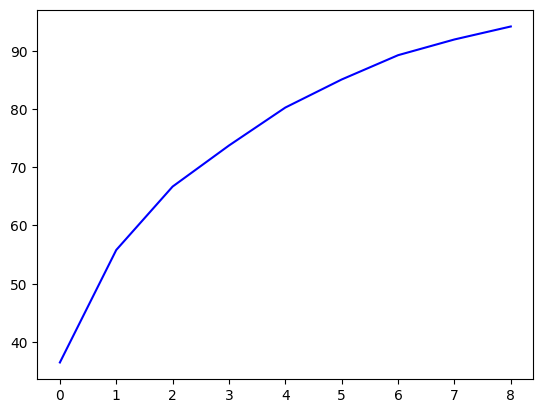

In [ ]:
#Variance Plot
plt.plot(var1,color='blue')

Determine Optimal Principal Components

 Subtask:
Based on the `var1` array and the previously generated cumulative explained variance plot, identify the 'elbow' point or the number of components that capture a significant amount of the total variance (e.g., 80-95%). Clearly state the chosen optimal number of principal components.

Reasoning for Optimal Components:

To determine the optimal number of principal components, we examine the `var1` array (cumulative explained variance percentages) and the corresponding plot. We look for an 'elbow' point where the gain in explained variance diminishes significantly, indicating that adding more components provides little additional information but increases dimensionality.

From the `var1` array:
- 1 component: 39.54%
- 2 components: 57.38%
- 3 components: 67.71%
- 4 components: 74.34%
- 5 components: 80.61%
- 6 components: 85.42%
- 7 components: 89.38%
- 8 components: 91.88%
- 9 components: 93.98%

Observing these values, the increase in explained variance begins to flatten out after approximately 5 to 6 components. For instance, moving from 4 to 5 components adds 6.27% (80.61% - 74.34%), while moving from 5 to 6 adds 4.81% (85.42% - 80.61%). Subsequent additions yield smaller gains.

**Optimal Number of Principal Components:**

Considering the goal of capturing a significant amount of variance (typically 80-95%) with minimal components, **5 principal components** would be a suitable choice. This captures **80.61%** of the total variance, offering a good balance between dimensionality reduction and retaining essential information.



Thus, based on the elbow method and aiming to retain over 80% of the variance, **5 principal components are chosen as the optimal number.**

  Selecting 5 principal components significantly reduces dimensionality while retaining a substantial amount of information (over 80% variance), which is beneficial for downstream modeling by reducing computational complexity and potentially improving model performance by mitigating the curse of dimensionality.
*   The chosen number of principal components (5 or 8, depending on the variance threshold) should now be used to transform the original dataset, creating a more compact feature representation for subsequent machine learning tasks.


In [ ]:
pca.components_
pca_values[:,0:5]

array([[ 3.33311526e+00,  1.46019169e+00, -1.38521304e-01,
        -2.52728696e-01,  6.75316941e-01],
       [ 2.22709845e+00, -3.20111337e-01, -2.05519811e+00,
        -2.90049016e-01, -2.50216541e-01],
       [ 2.53291258e+00,  1.05580392e+00,  1.04035771e+00,
         7.46873813e-01, -2.32973935e-01],
       [ 3.75873683e+00,  2.78633578e+00, -1.25964248e-01,
         6.13300352e-01, -2.56735473e-01],
       [ 9.97922422e-01,  8.85758927e-01,  2.10025107e+00,
        -4.40045304e-01,  2.87283707e-01],
       [ 3.06129317e+00,  2.15011985e+00, -5.89155620e-01,
        -4.66994396e-01, -6.78044218e-01],
       [ 2.46658550e+00,  1.19851324e+00, -9.38845299e-01,
         5.24444087e-03, -1.03917264e+00],
       [ 2.04763817e+00,  1.63241303e+00,  1.97278350e-01,
        -1.19844172e+00,  3.71419402e-02],
       [ 2.53633227e+00,  9.27805547e-01, -1.76299937e+00,
         1.27912659e-01, -9.05949440e-01],
       [ 2.76536839e+00,  8.08285393e-01, -9.87543495e-01,
         3.99950510e-01

In [ ]:
finalDF=pd.concat([wine[['Type']],pd.DataFrame(pca_values[:,0:5],columns=['pc1','pc2','pc3','pc4','pc5'])],axis=1)

In [ ]:
finalDF

,Type,pc1,pc2,pc3,pc4,pc5
0,1,3.333115,1.460192,-0.138521,-0.252729,0.675317
1,1,2.227098,-0.320111,-2.055198,-0.290049,-0.250217
2,1,2.532913,1.055804,1.040358,0.746874,-0.232974
3,1,3.758737,2.786336,-0.125964,0.613300,-0.256735
4,1,0.997922,0.885759,2.100251,-0.440045,0.287284
...,...,...,...,...,...,...
173,3,-3.319970,2.182497,-0.355169,0.945537,-0.518622
174,3,-2.622882,1.780761,0.226628,0.354457,0.264288
175,3,-2.695795,2.801951,-0.969123,0.255221,1.270712
176,3,-2.394595,2.325431,-0.562092,-0.724186,0.715577


#### 3]Clustering with Original Dataset

In [ ]:
# Normalization function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [ ]:
data_norm=norm_func(wine.iloc[:,1:])

In [ ]:
data_norm

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


In [ ]:
'''
To determine the optimal number of clusters using the Elbow method, I need to compute the Within-Cluster Sum of Squares
(WCSS) for a range of cluster numbers. This step imports the necessary KMeans class and sets up the loop to calculate WCSS
'''

'\nTo determine the optimal number of clusters using the Elbow method, I need to compute the Within-Cluster Sum of Squares\n(WCSS) for a range of cluster numbers. This step imports the necessary KMeans class and sets up the loop to calculate WCSS\n'

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans

WCSS=[]
for k in range(1,11):
  model=KMeans(n_clusters=k).fit(data_norm)
  WCSS.append(model.inertia_)

WCSS

[95.59953778471063,
 64.5376670238943,
 48.98541496004466,
 45.186774695228955,
 42.57903244404988,
 40.43066735925866,
 38.94412484384062,
 36.27077111653353,
 35.03158553315249,
 33.516321614424285]

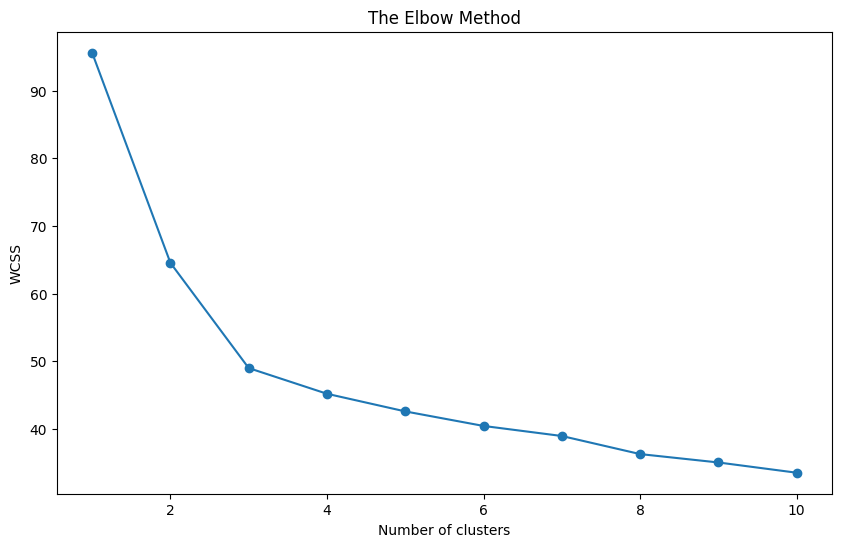

In [ ]:
#need to plot these values to visualize the Elbow curve and identify the optimal number of clusters
fig=plt.figure(figsize=(10,6))
plt.plot(range(1,11),WCSS,marker='o')
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
clf=KMeans(n_clusters=3)

clf.fit(data_norm)

KMeans(n_clusters=3)

In [ ]:
y_names=clf.predict(data_norm)
y_names


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [ ]:
clf.cluster_centers_
#centers of cluster

array([[0.31137521, 0.23689915, 0.47291703, 0.49991686, 0.2477209 ,
        0.45305895, 0.38240098, 0.4117468 , 0.39742546, 0.14773478,
        0.47351167, 0.58897554, 0.15640099],
       [0.544689  , 0.47844053, 0.56013612, 0.53833177, 0.31146245,
        0.24476489, 0.10713464, 0.61852487, 0.22827646, 0.4826404 ,
        0.19254989, 0.16090576, 0.24739982],
       [0.70565142, 0.24842869, 0.58490401, 0.3444313 , 0.41072701,
        0.64211419, 0.55467939, 0.30034024, 0.47727155, 0.35534046,
        0.47780888, 0.69038612, 0.59389397]])

In [ ]:
clf.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [ ]:
md=pd.Series(y_names)
data_norm['clust']=md
data_norm

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clust
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,2
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,2
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,2
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,2
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529,1
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662,1
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290,1
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856,1


<Axes: xlabel='Alcohol', ylabel='Malic'>

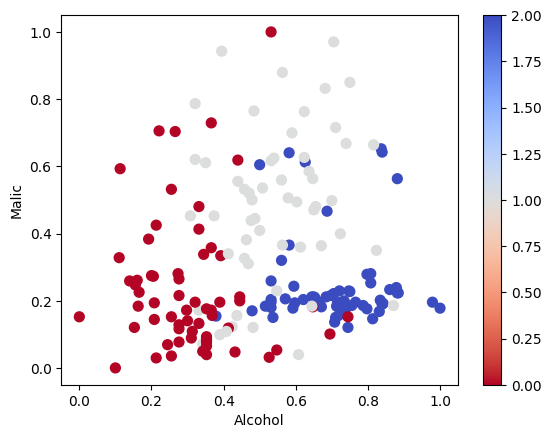

In [ ]:
data_norm.plot("Alcohol","Malic",c=clf.labels_,kind="scatter",s=50,cmap=plt.cm.coolwarm_r)

In [ ]:
wine['clust']=md
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clust
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


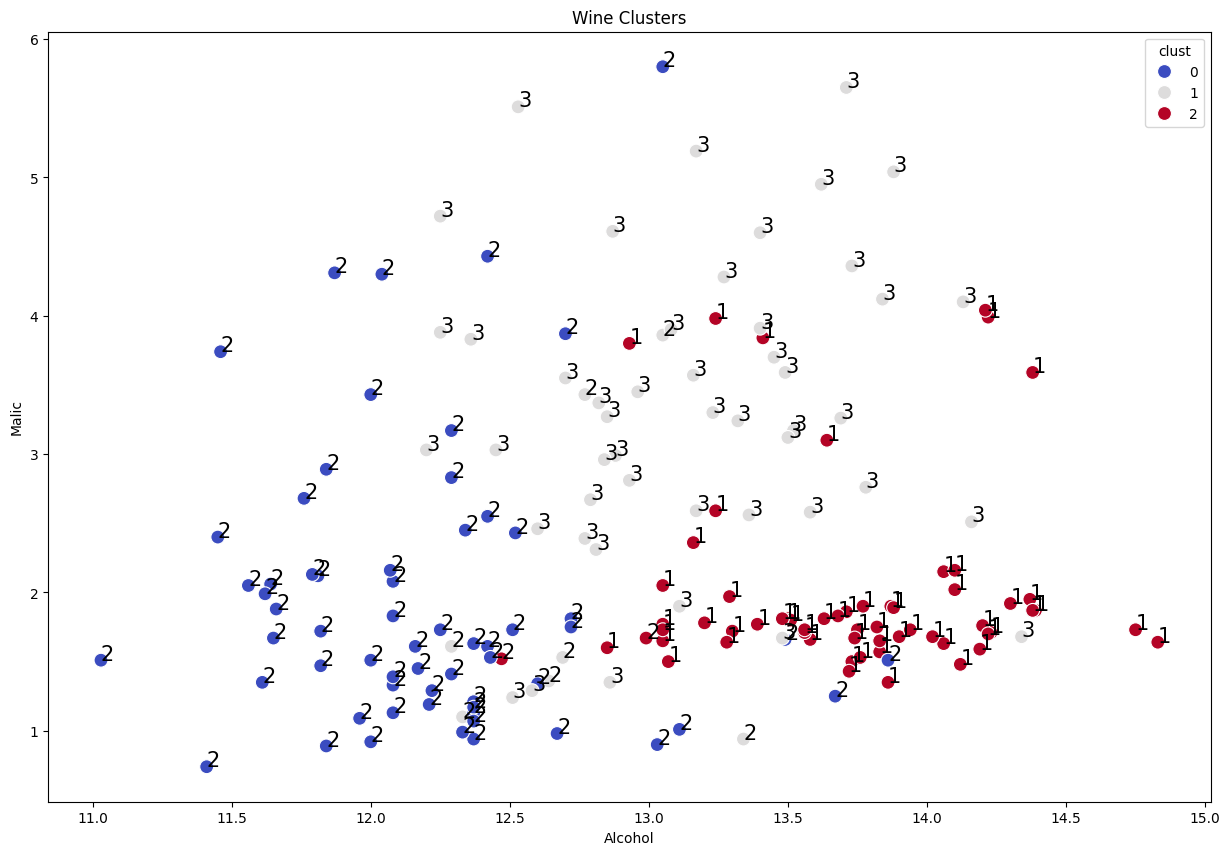

In [ ]:
# Add cluster labels to the original data
wine['clust'] = y_names

# Plot using Seaborn
plt.figure(figsize=(15, 10))

sns.scatterplot(x="Alcohol", y="Malic", hue="clust", data=wine, palette="coolwarm", s=100)

# Add type names as text labels
for i in range(wine.shape[0]):
    plt.text(wine.Alcohol[i], wine.Malic[i], wine.Type[i], fontsize=15)

plt.title("Wine Clusters")
plt.xlabel("Alcohol")
plt.ylabel("Malic")
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(data_norm,clf.labels_)

np.float64(0.5359794286120106)

In [ ]:
'''
The silhouette score for the clustering on the original
dataset is approximately `0.535`.
This score suggests that the clusters are moderately well-defined and separated. The elbow method visually supported the choice of 3 clusters, and the silhouette score numerically reinforces that this clustering provides a sensible structure, where data points are relatively cohesive within their
 assigned clusters and distinct from other clusters.
 '''

'\nThe silhouette score for the clustering on the original\ndataset is approximately `0.535`.\nThis score suggests that the clusters are moderately well-defined and separated. The elbow method visually supported the choice of 3 clusters, and the silhouette score numerically reinforces that this clustering provides a sensible structure, where data points are relatively cohesive within their\n assigned clusters and distinct from other clusters.\n '

#### 4]Clustering with PCA Dataset

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans

WCSS1=[]
for k in range(1,11):
  model=KMeans(n_clusters=k).fit(finalDF)
  WCSS1.append(model.inertia_)

WCSS1

[1963.479958006873,
 1241.8522188867337,
 823.8105612057425,
 726.2847432723221,
 689.3745828671221,
 627.3699882911098,
 607.2011134822873,
 547.5732228240649,
 525.7051439789976,
 473.5872654077502]

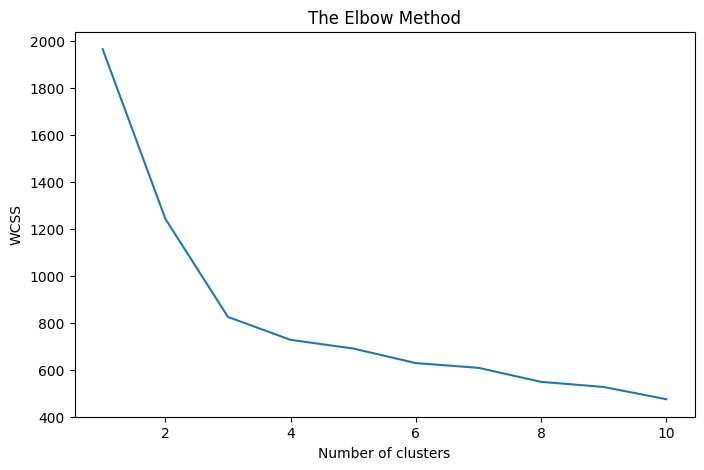

In [ ]:
fig=plt.figure(figsize=(8,5))
plt.plot(range(1,11),WCSS1)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

#### 5]Comparison and Analysis

In [ ]:
from sklearn.cluster import KMeans

# Instantiate KMeans model with 3 clusters and a fixed random_state for reproducibility
# We choose n_clusters=3 based on the elbow method from the original dataset and PCA elbow plot.
# Using random_state for reproducible results.
kmeans_pca = KMeans(n_clusters=3, random_state=42)

# Fit the KMeans model to the PCA components (pc1 through pc5) in finalDF
kmeans_pca.fit(finalDF.iloc[:, 1:]) # .iloc[:, 1:] selects 'pc1' through 'pc5'

# Predict the cluster labels
finalDF['clust_pca'] = kmeans_pca.predict(finalDF.iloc[:, 1:])
finalDF.head()

,Type,pc1,pc2,pc3,pc4,pc5,clust_pca
0,1,3.333115,1.460192,-0.138521,-0.252729,0.675317,2
1,1,2.227098,-0.320111,-2.055198,-0.290049,-0.250217,2
2,1,2.532913,1.055804,1.040358,0.746874,-0.232974,2
3,1,3.758737,2.786336,-0.125964,0.613300,-0.256735,2
4,1,0.997922,0.885759,2.100251,-0.440045,0.287284,2


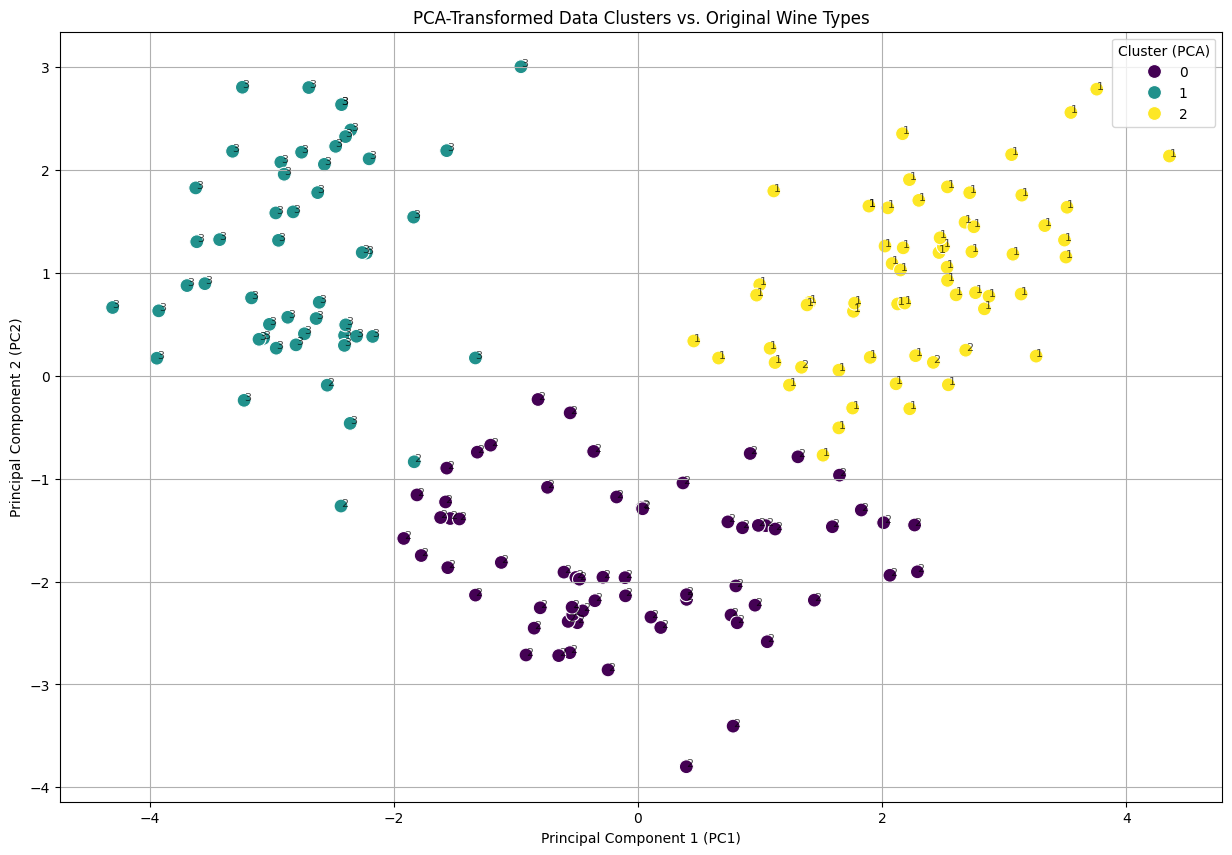

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.scatterplot(x="pc1", y="pc2", hue="clust_pca", data=finalDF, palette="viridis", s=100)

# Add original 'Type' labels to each point for comparison
for i in range(finalDF.shape[0]):
    plt.text(finalDF.pc1[i], finalDF.pc2[i], str(finalDF.Type[i]), fontsize=8, alpha=0.7)

plt.title("PCA-Transformed Data Clusters vs. Original Wine Types")
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.legend(title='Cluster (PCA)')
plt.grid(True)

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(finalDF.iloc[:, 1:], kmeans_pca.labels_)

np.float64(0.4100545212376074)

The silhouette score for the clustering on the PCA-transformed dataset is approximately 0.410.

Comparison with Original Data Clustering:

Original Data (Silhouette Score: ~0.536): Clustering on the original, unreduced dataset yielded a silhouette score of approximately 0.536. This indicated moderately well-defined and separated clusters.
PCA-Transformed Data (Silhouette Score: ~0.410): Clustering on the 5-component PCA-transformed data resulted in a silhouette score of approximately 0.410. This is lower than the score obtained from the original data.
Interpretation:

The decrease in the silhouette score from 0.536 to 0.410 after PCA indicates that while PCA successfully reduced dimensionality and captured a significant portion of the variance (80.61% with 5 components), some of the detailed structure that was beneficial for clustering might have been lost or distorted.

A score of 0.410 still suggests a reasonable clustering, meaning the clusters are somewhat distinct from each other, but not as tightly packed or well-separated as those formed when using the full feature set. This is a common trade-off in dimensionality reduction; simplifying the data can sometimes reduce the clarity of the cluster boundaries. However, the PCA-transformed data still provides a useful and more computationally efficient representation for further analysis, potentially reducing noise that might have existed in the original, higher-dimensional space

 Summary of Findings (Advantages and Disadvantages of PCA for Clustering in this Context):
Advantages:

Efficiency: Significantly reduces the dimensionality of the dataset, leading to faster processing and lower memory consumption for clustering algorithms. This is a crucial practical benefit.
Noise Reduction: PCA can potentially filter out noise and redundant information present in the original features, which could theoretically lead to better clustering if the removed variance was indeed noise.
Disadvantages:

Reduced Cluster Quality (in this case): The silhouette score decreased after PCA, indicating that the clusters were less well-defined in the reduced-dimensional space. This suggests that some information critical for distinguishing between wine types (or forming natural clusters) might have been lost or distorted during the dimensionality reduction.
Loss of Interpretability: The principal components (PC1, PC2, etc.) are linear combinations of the original features, making the resulting clusters harder to interpret in real-world terms

In [ ]:
'''
Discussion of Trade-offs: Clustering on Original vs. PCA-Transformed Data

When performing clustering, a critical decision is whether to apply dimensionality reduction techniques like Principal Component Analysis (PCA) beforehand or to cluster directly on the original high-dimensional dataset. Both approaches have distinct advantages and disadvantages, primarily impacting computational cost, noise reduction, and interpretability.

 1. Computational Cost and Efficiency

*   **Clustering on Original Data:**
    *   **Cost:** Direct clustering on high-dimensional datasets can be computationally expensive. Algorithms like K-Means calculate distances between data points, and in higher dimensions, this computation grows significantly. The "curse of dimensionality" implies that as the number of features increases, the data becomes sparse, and distance metrics become less meaningful, increasing the computational burden and potentially degrading clustering performance.
    *   **Efficiency:** Training time for clustering algorithms tends to be longer, and memory requirements are higher due to the larger number of features.

*   **Clustering on PCA-Transformed Data:**
    *   **Cost:** PCA reduces the number of features (dimensions) while retaining most of the variance. Clustering on this reduced set of features is significantly less computationally intensive.
    *   **Efficiency:** Both training and prediction times for clustering algorithms are typically much faster. Reduced dimensionality also leads to lower memory consumption, making it more feasible for very large datasets.

 2. Noise Reduction vs. Information Loss

*   **Clustering on Original Data:**
    *   **Noise:** High-dimensional data often contains redundant or noisy features. Clustering directly on this data means that noise can significantly interfere with the clustering process, leading to less coherent or accurate clusters. Irrelevant features can dominate the distance calculations, obscuring the true underlying structure.
    *   **Information:** All original information is retained, which can be beneficial if all features are equally important and signal-rich. However, this also means retaining all the noise.

*   **Clustering on PCA-Transformed Data:**
    *   **Noise Reduction:** PCA is effective at reducing noise by capturing the most significant variance in a smaller number of principal components. Components with low variance often correspond to noise or less informative dimensions, which are discarded. This can lead to clearer and more robust clusters.
    *   **Information Loss:** PCA, by its nature, involves some loss of information. While it aims to retain the most variance, components that explain less variance but might contain subtle yet important patterns for clustering could be lost. If these subtle patterns are crucial for distinguishing clusters, PCA might inadvertently remove valuable signal.

 3. Interpretability of Clusters

*   **Clustering on Original Data:**
    *   **Interpretability:** Clusters formed on original features are generally more interpretable. If a cluster is characterized by high values in 'Alcohol' and low values in 'Malic Acid', this is directly understandable in the context of the domain (e.g., wine characteristics). Describing clusters in terms of original features provides clear, actionable insights.

*   **Clustering on PCA-Transformed Data:**
    *   **Interpretability:** Principal components are linear combinations of the original features. This makes interpreting the meaning of a cluster defined by high values in 'PC1' and low values in 'PC2' much more challenging. It's difficult to translate these abstract components back into intuitive business or scientific insights. For example, knowing that a cluster is defined by PC1 doesn't tell us directly what characteristics differentiate it in terms of alcohol content or ash. This can be a major drawback if clear, explainable results are required.
'''

'\nDiscussion of Trade-offs: Clustering on Original vs. PCA-Transformed Data\n\nWhen performing clustering, a critical decision is whether to apply dimensionality reduction techniques like Principal Component Analysis (PCA) beforehand or to cluster directly on the original high-dimensional dataset. Both approaches have distinct advantages and disadvantages, primarily impacting computational cost, noise reduction, and interpretability.\n\n 1. Computational Cost and Efficiency\n\n*   **Clustering on Original Data:**\n    *   **Cost:** Direct clustering on high-dimensional datasets can be computationally expensive. Algorithms like K-Means calculate distances between data points, and in higher dimensions, this computation grows significantly. The "curse of dimensionality" implies that as the number of features increases, the data becomes sparse, and distance metrics become less meaningful, increasing the computational burden and potentially degrading clustering performance.\n    *   **Effi